# KNN

#### Tasks:
1. Analyse the data using the visualizations

In [29]:
import pandas as pd

df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [30]:
features = df.columns.to_list()
features

['animal name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Avinash\AppData\Local\Temp\ipykernel_1432\1555854512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette="coolwarm")


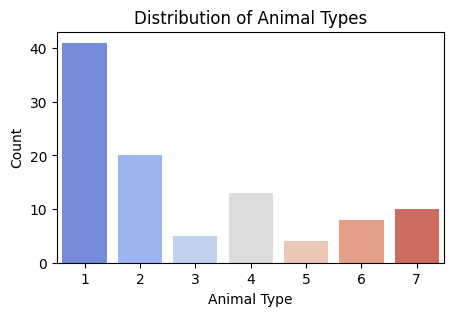

In [32]:
# CountPlot

plt.figure(figsize=(5,3))
sns.countplot(data=df, x='type', palette="coolwarm")
plt.title("Distribution of Animal Types")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.show()


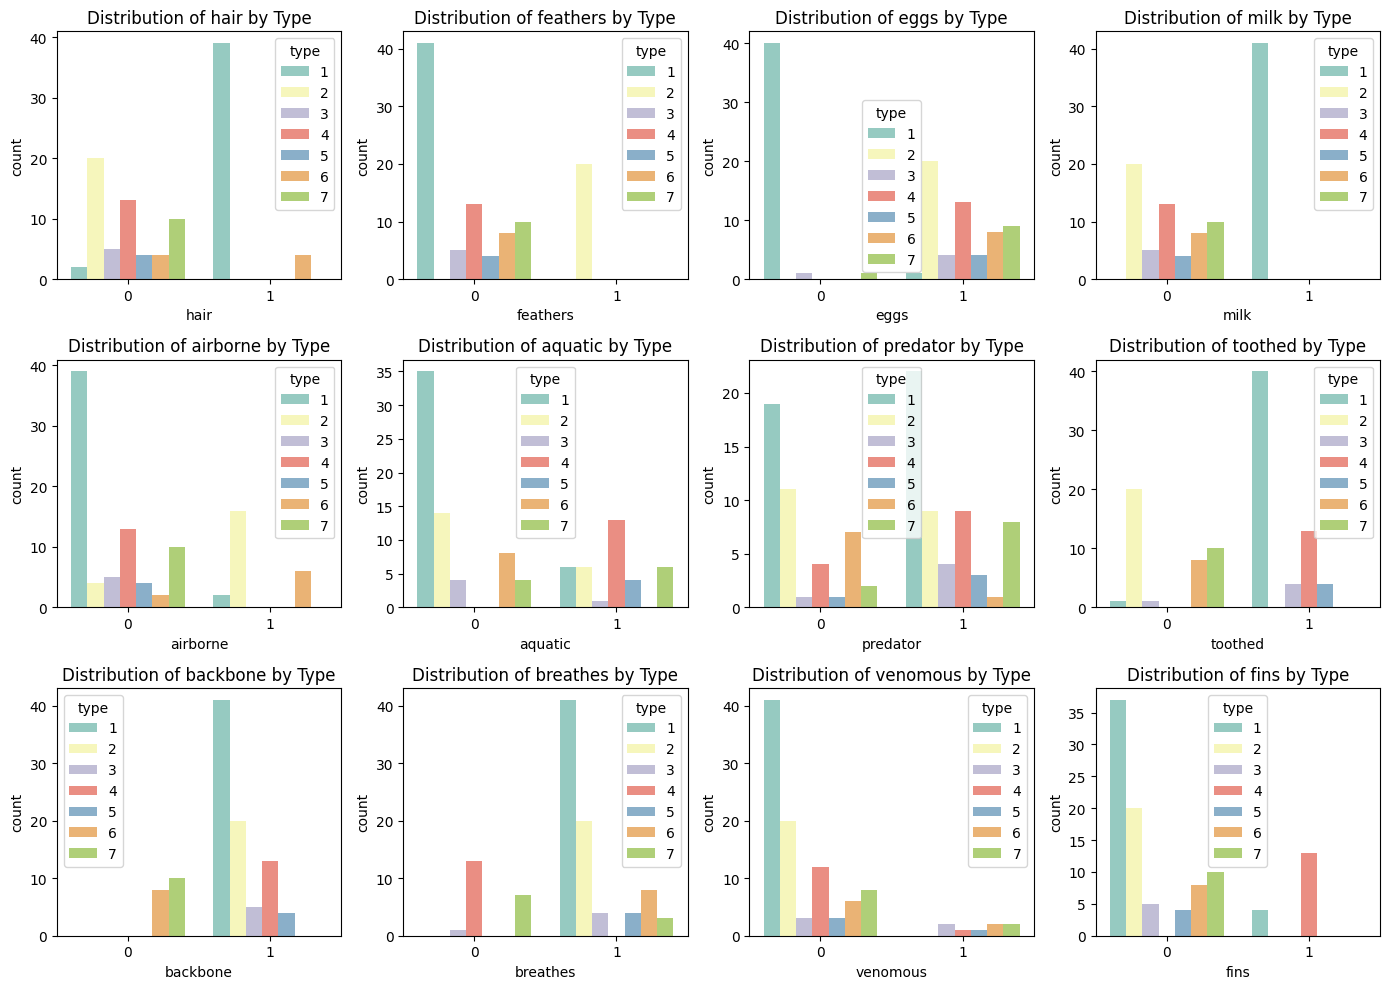

In [33]:
binary_features = [col for col in df.columns if df[col].nunique() == 2]

plt.figure(figsize=(14,10))
for i, col in enumerate(binary_features[:12], 1):
    plt.subplot(3,4,i)
    sns.countplot(data=df, x=col, hue='type', palette="Set3")
    plt.title(f"Distribution of {col} by Type")
plt.tight_layout()
plt.show()

2. Preprocess the data by handling missing values & Outliers, if any.

In [34]:
df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [35]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [36]:
import numpy as np


for col in features[1:]:
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    Lower = Q1 - IQR*1.5
    Upper = Q3 + IQR*1.5

    ouliers = df[col][(df[col]>Upper) | (df[col]<Lower)] 

    print(f"Outlers in {col}: ",len(ouliers))

    df[col] = np.where(df[col]>Upper,Upper,np.where(df[col]<Lower,Lower,df[col]))





Outlers in hair:  0
Outlers in feathers:  20
Outlers in eggs:  0
Outlers in milk:  0
Outlers in airborne:  24
Outlers in aquatic:  0
Outlers in predator:  0
Outlers in toothed:  0
Outlers in backbone:  18
Outlers in breathes:  21
Outlers in venomous:  8
Outlers in fins:  17
Outlers in legs:  2
Outlers in tail:  0
Outlers in domestic:  13
Outlers in catsize:  0
Outlers in type:  0


- Split the dataset into training and testing sets (80% training, 20% testing).

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop(['type','animal name'],axis=1)
Y = df['type'].values


x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
# (len(x_train),len(y_train))
Y

array([1., 1., 4., 1., 1., 1., 1., 4., 4., 1., 1., 2., 4., 7., 7., 7., 2.,
       1., 4., 1., 2., 2., 1., 2., 6., 5., 5., 1., 1., 1., 6., 1., 1., 2.,
       4., 1., 1., 2., 4., 6., 6., 2., 6., 2., 1., 1., 7., 1., 1., 1., 1.,
       6., 5., 7., 1., 1., 2., 2., 2., 2., 4., 4., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 7., 4., 1., 1., 3., 7., 2., 2., 3., 7., 4., 2., 1.,
       7., 4., 2., 6., 5., 3., 3., 4., 1., 1., 2., 1., 6., 1., 7., 2.])

- Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [38]:
from sklearn.neighbors import KNeighborsClassifier
y_train = y_train.reshape(-1,1)
y_train

array([[5.],
       [5.],
       [6.],
       [1.],
       [7.],
       [6.],
       [7.],
       [1.],
       [1.],
       [2.],
       [3.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [7.],
       [1.],
       [2.],
       [7.],
       [4.],
       [4.],
       [2.],
       [4.],
       [1.],
       [1.],
       [1.],
       [5.],
       [3.],
       [1.],
       [7.],
       [6.],
       [1.],
       [1.],
       [4.],
       [4.],
       [2.],
       [1.],
       [1.],
       [1.],
       [6.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [7.],
       [1.],
       [4.],
       [1.],
       [3.],
       [2.],
       [2.],
       [1.],
       [3.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [7.],
       [2.],
       [1.],
       [1.],
       [5.],
       [2.],
       [4.],
       [2.],
       [2.],
       [7.],
       [1.],
       [4.],
       [4.],
       [2.],
       [4.],
       [2.],

. Choose an appropriate distance metric and value for K.

In [39]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
y_pred


c:\Users\Avinash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1., 1., 4., 1., 1., 6., 1., 1., 1., 1., 4., 6., 6., 2., 4., 1., 1.,
       2., 4., 1., 4.])

. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [40]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("precision_score: ",precision_score(y_test,y_pred,average='macro'))
print("recall_score: ",recall_score(y_test,y_pred,average='macro'))
print("f1_score: ",f1_score(y_test,y_pred,average='macro'))



Accuracy Score:  0.8571428571428571
precision_score:  0.5666666666666667
recall_score:  0.6527777777777778
f1_score:  0.587991718426501


c:\Users\Avinash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [41]:
# import warnings

# warnings.filterwarnings('ignore')


# from sklearn.model_selection import GridSearchCV

# model = KNeighborsClassifier()
# grid = GridSearchCV(estimator=model,param_grid={'n_neighbors':np.array(range(1,30))})
# grid.fit(x_train,y_train)


# (grid.best_params_,grid.best_score_)

7. Visualize the decision boundaries of the classifier.

c:\Users\Avinash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


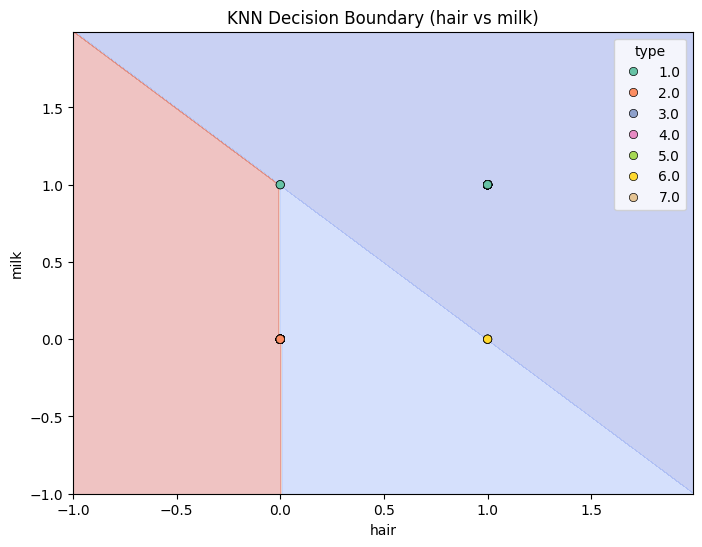

In [51]:
# Select two meaningful features
feat1 = 'hair'
feat2 = 'milk'

X_2d = df[[feat1, feat2]]
y_2d = df['type']

# Train-Test Split
x_train_2d, x_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.2, random_state=42)

# Train KNN
knn_2f = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_2f.fit(x_train_2d, y_train_2d)

# Create a meshgrid
x_min, x_max = X_2d[feat1].min() - 1, X_2d[feat1].max() + 1
y_min, y_max = X_2d[feat2].min() - 1, X_2d[feat2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict
Z = knn_2f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the boundaries
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X_2d[feat1], y=X_2d[feat2], hue=y_2d, palette='Set2', edgecolor='k')
plt.title(f"KNN Decision Boundary ({feat1} vs {feat2})")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.show()


### Interview Questions:

### 1. Key Hyperparameters in KNN:

n_neighbors – Number of nearest data points (K) considered for classification; smaller K → more complex boundary, larger K → smoother decision boundary.

weights – Determines how neighbors influence the result ('uniform' = equal weight, 'distance' = closer neighbors have more impact).

### 2) Distance Metrics used in KNN:

Euclidean Distance – Most common metric, measures straight-line distance between points (used for continuous features).

Manhattan or Minkowski Distance – Measures distance along axes; useful when features have different scales or distributions.